In [27]:
import warnings
warnings.filterwarnings("ignore")

## Data info
##### sbp : systolic blood pressure
##### tobacco : cumulative tobacco (kg)
##### ldl : low densiity lipoprotein cholesterol 
##### adiposity(비만)
##### famhist : family history of heart disease (Present, Absent)
##### typea : type-A behavior
##### obesity
##### alcohol : current alcohol consumption
##### age : age at onset
##### chd : response, coronary heart disease

In [38]:
import pandas as pd
from pandas import DataFrame

SAheart = pd.read_csv('dataset.csv')
SAheart.head()

,row,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [39]:
SAheart.drop(['row'], axis=1, inplace=True)

In [19]:
SAheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [20]:
SAheart.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
SAheart["famhist"] = lb_make.fit_transform(SAheart["famhist"])
SAheart.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


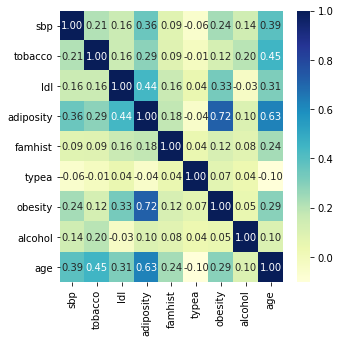

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(data=SAheart[SAheart.columns[:9]].corr(),cmap='YlGnBu',annot=True,fmt='.2f')

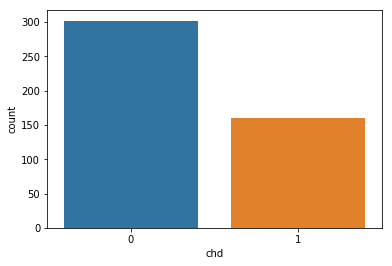

In [25]:
sns.countplot(x='chd', data=SAheart)
plt.show()

In [28]:
from sklearn.cross_validation import train_test_split 
Y=SAheart['chd'] 
X=SAheart.iloc[:,:9] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
model.coef_

array([[-0.0096056 ,  0.07140518,  0.16995382,  0.0451829 ,  0.90856829,
         0.0138995 , -0.11335818,  0.00257744,  0.04632074]])

In [53]:
model.intercept_

array([-1.84123579])

In [54]:
model.score(X_test, Y_test)

0.697841726618705